# Data Madness
### Rodrigo Alejandro Chávez Mulsa & Lillian Alice Wu

Data retrieved from: https://www.kaggle.com/mohalim/video-games-sales

Grading rubric:

* Key idea: Do you have main takeaways?
* Scope: Given the dataset selected, did you choose the appropriate level of complexity to explain everything?
* Process: Did you follow the standard data analysis process (EDA, models, evaluation)?
* Solution: Is the analysis effective and answering the intended questions?
* Presentation: Is your video clear, engaging and effective? Questions: Did you answer them properly? 

*Use this assignment to submit a link where your video is to be found (e.g. youtube, vimeo, etc.) and submit a 1/2-1 page abstract of your approach. Mention your partner (you do not need to do double submissions).*


## Questions we answer:

* What are the genres that are more likely to get a high rating? And does it
differ between regions?
* Does the release time of the year has a correlation with the sales?
* Does user rating reflect more on the sales or is it the critics rating?
* How does the popularity of platforms change throughout the years?

# EDA
## Setup

In [168]:
import IPython.core.display
import matplotlib
def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1
    matplotlib.rcParams['axes.grid'] = True
    matplotlib.rcParams['grid.color'] = 'k'
    matplotlib.rcParams['grid.linestyle'] = ':'
    matplotlib.rcParams['grid.linewidth'] = 0.5

apply_styles()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [169]:
df = pd.read_csv("data/vgsales.csv")
# df.value.astype(int, copy=False);
df.shape

(16719, 16)

In [170]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# df.Year_of_Release.value_counts()
# df.shape
# df.loc[0]

### Deal with missing values and wrong types

In [172]:
df.Name.isnull()
df = df[df['Name'].notna()]
# df.User_Score.isnull().sum()

In [173]:
#non-numeric value convert to NaN
df['User_Score'] = df['User_Score'].apply(pd.to_numeric, errors='coerce')
# df.dtypes

In [174]:
df[['Publisher', 'Developer','Rating']]=df[['Publisher', 'Developer','Rating']].fillna(value='missing')
df[['Year_of_Release','Critic_Count', 'Critic_Score', 'User_Count']] = df[['Year_of_Release','Critic_Count', 'Critic_Score', 'User_Count']].astype('Int64')
# df.dtypes

In [175]:
cols_float = df.select_dtypes(include=['number']).columns
cols_float =cols_float.delete(0) #delete Release year
# df[cols_float] = df[cols_float].fillna(-1)
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,missing,missing
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,missing,missing


In [176]:
#Compute missing global sales based on sales in available regions
for i, r in df.iterrows():
    if r.Global_Sales<0:
        df.Global_Sales.at[i] = sum(r[c] if (('Sales' in c) and (r[c]>0)) else 0 for c in r.index)
df[df.Global_Sales<0]
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,missing,missing
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,missing,missing


## Visualize stuff

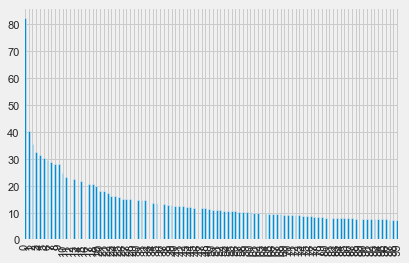

In [177]:
df.sort_values(by=['Global_Sales'],ascending=False)
df.Global_Sales[:100].plot.bar()

In [178]:
df[df['Name'] == 'Monopoly'].head(3) #We see games are repeated since every platform has diff. values
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [179]:
# df_genre.first()#[df_genre.Name == 'Minecraft']
df_genre = df.groupby(['Genre','Name'])
df['Genre']= df['Genre'].astype('category')
genres = df.Genre.cat.categories #get indexes* of categories

Text(0.5, 1.0, 'Total Game Count By Genres')

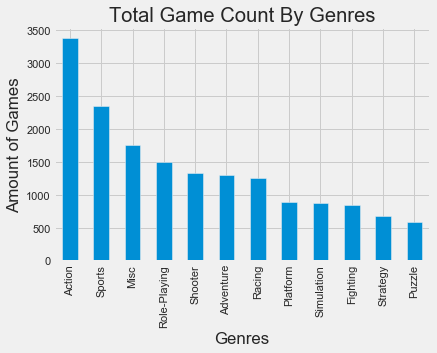

In [180]:
df['Genre'].value_counts().plot(kind='bar')
plt.xlabel("Genres");
plt.ylabel('Amount of Games') #TODO: merge same name
plt.title('Total Game Count By Genres')

In [181]:
# fig = plt.figure(figsize=(30,30))
# # Divide the figure into a 2x1 grid, and give me the first section
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)
# df.groupby('Genre')['Critic_Score'].mean().plot(kind='bar',ax=ax1)
a = df.groupby('Genre')['Critic_Score'].mean()
# ax1.set_xlabel("Genres")
# ax1.set_ylabel('Critic Score')
# ax1.set_title('Critic Score by Genres')
#plot by score
#in terms of rating from critic and users there is not that much of a difference
#role playing games has slightly hier ratings from both critics and users;

# df.groupby('Genre')['User_Score'].mean().plot(kind='bar',ax=ax1)
b = df.groupby('Genre')['User_Score'].mean()
b = b.multiply(10)
# ax2.set_xlabel("Genres");
# ax2.set_ylabel('Users Score')
# ax2.set_title('Users Score by Genres')

# sns.catplot(x='class', y='survival rate', hue='sex', data=df, kind='bar')

Text(0.5, 1.0, 'Users and Critic Scores by Genres')

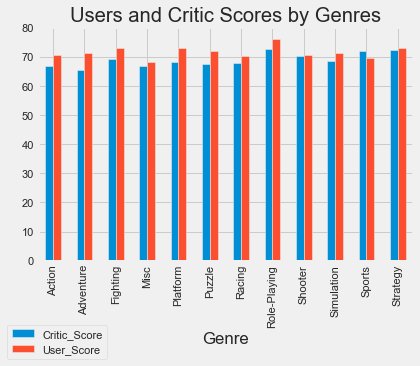

In [182]:
ab = pd.concat([a,b],axis=1)
ax = ab.plot(kind='bar')
ax.get_legend().set_bbox_to_anchor((0.2, -0.25))
ax.set_title('Users and Critic Scores by Genres')

Text(0.5, 1.0, 'Japan Sales by Genres')

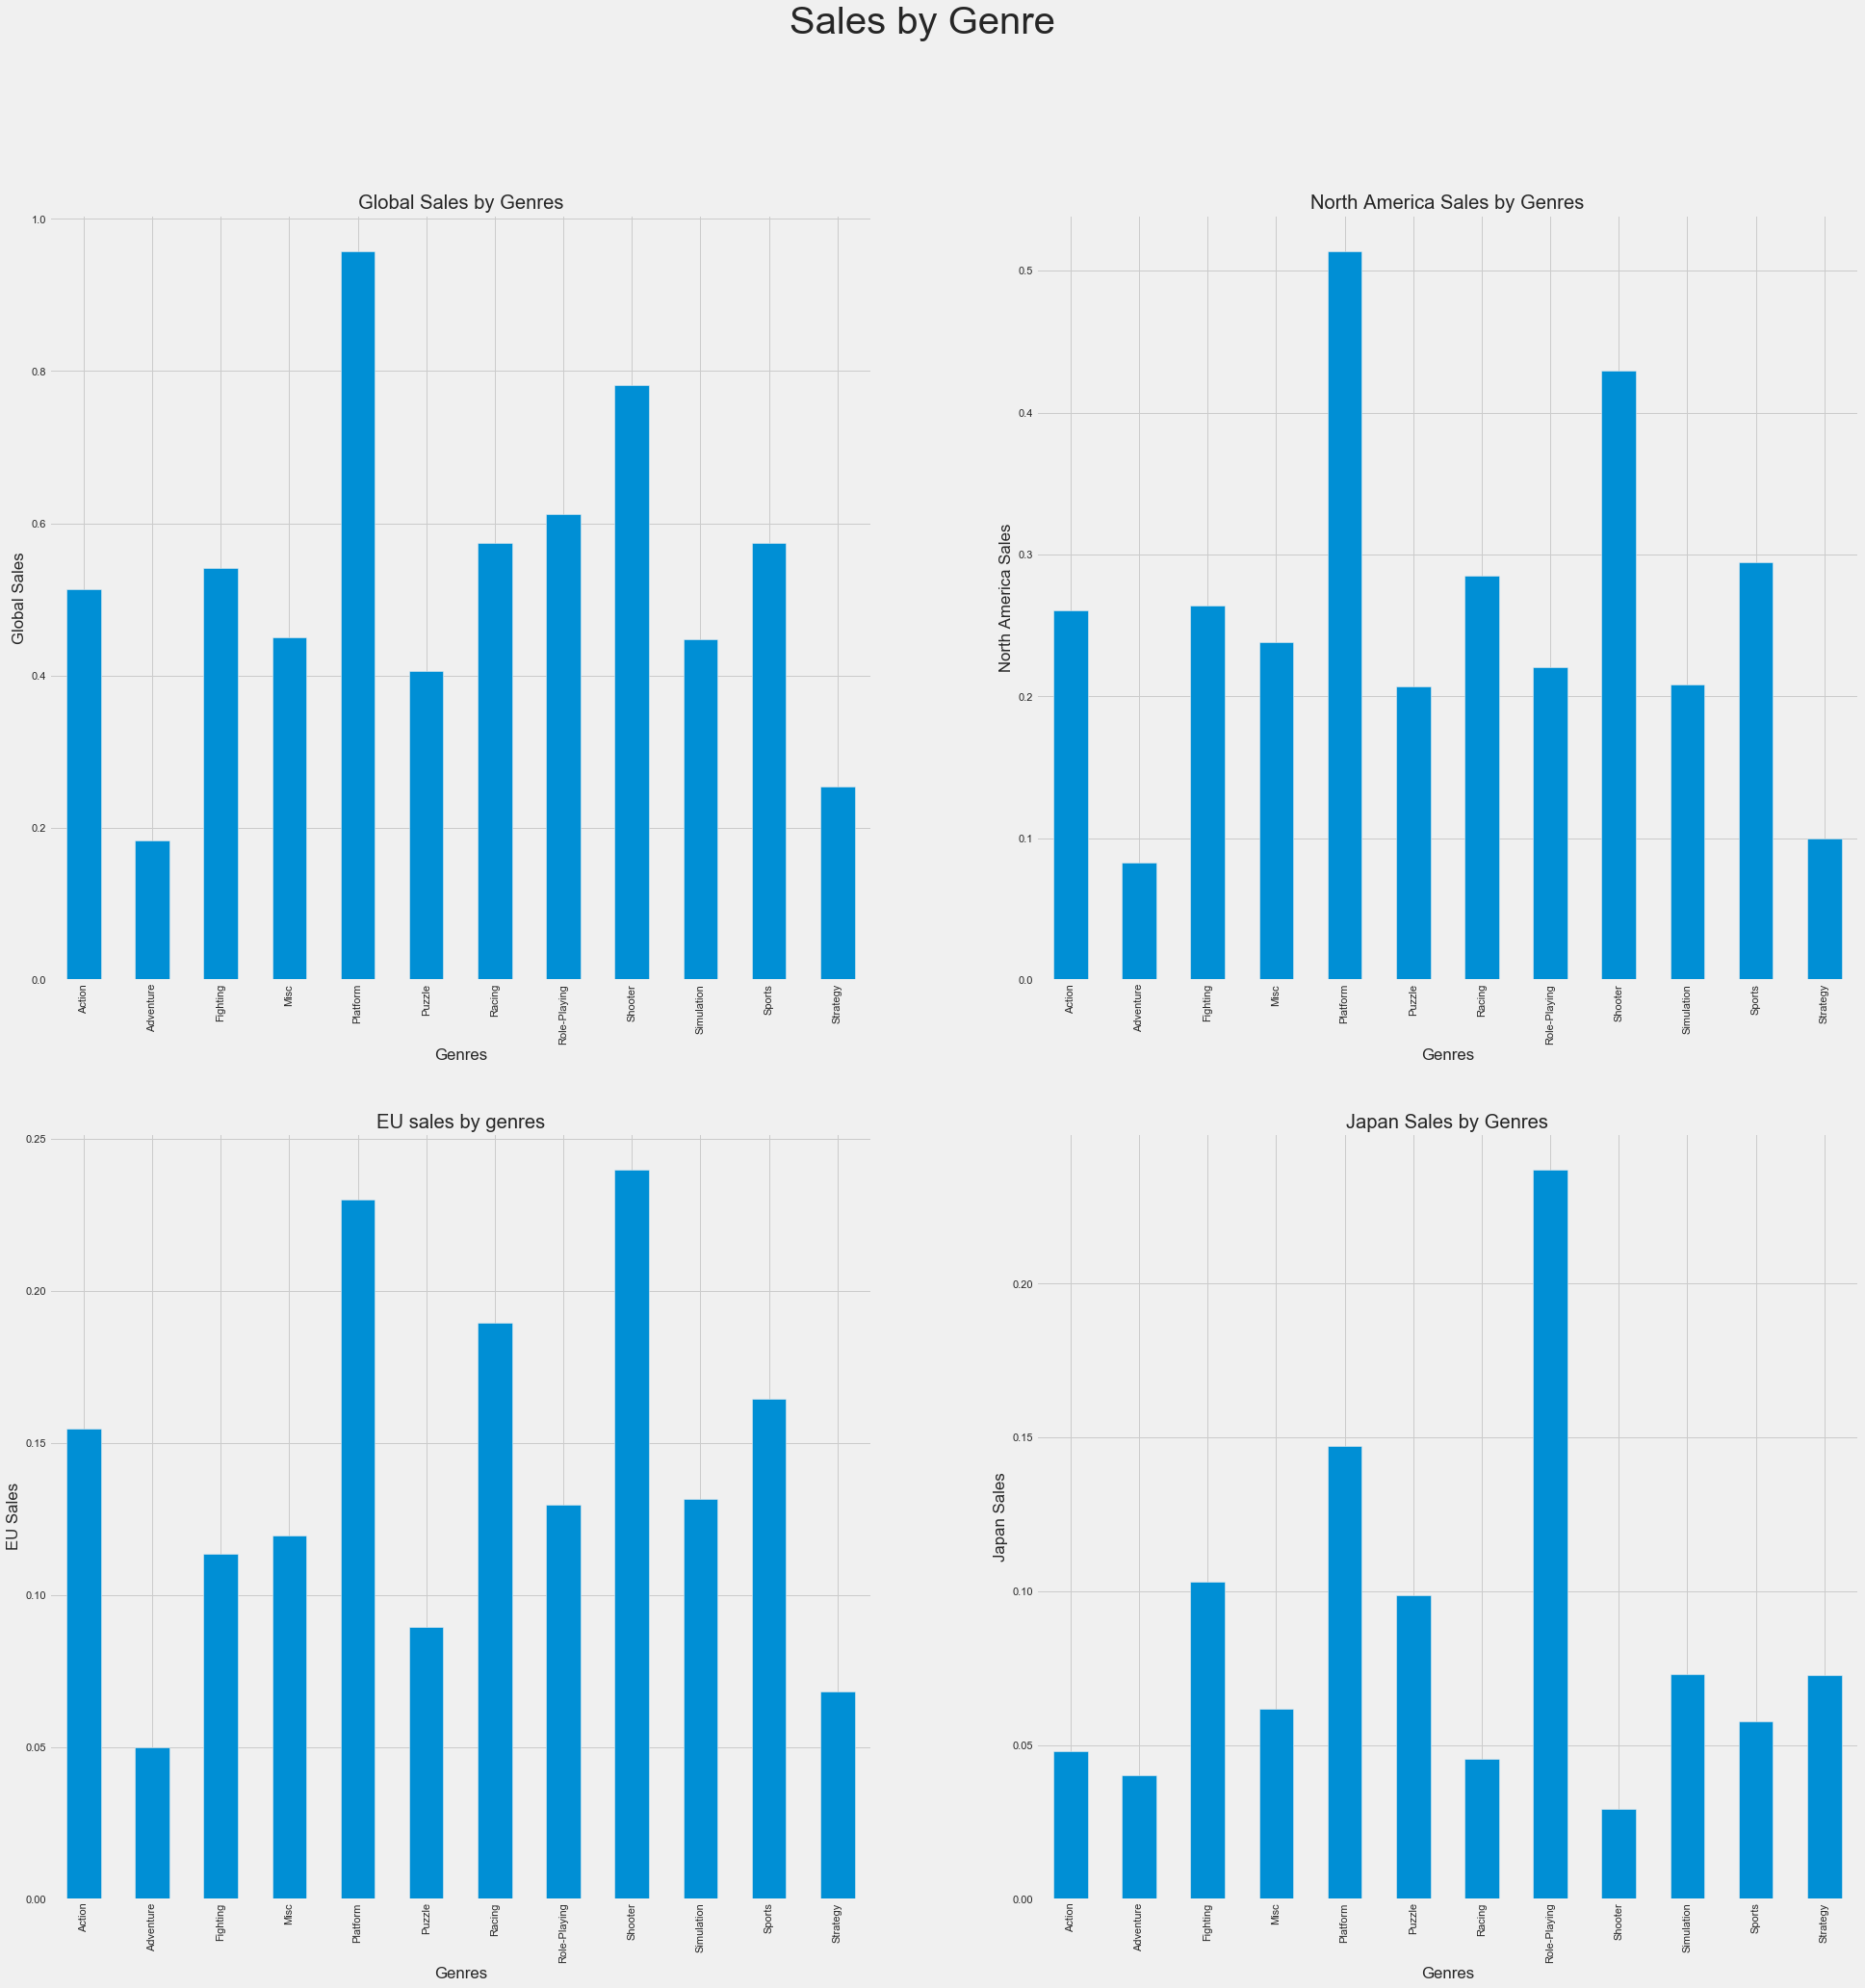

In [190]:
fig = plt.figure(figsize=(30,30))
fig.suptitle('Sales by Genre', fontsize=40)
# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df.groupby('Genre')['Global_Sales'].mean().plot(kind='bar',ax=ax1)
ax1.set_xlabel("Genres");
ax1.set_ylabel('Global Sales')
ax1.set_title('Global Sales by Genres')
#plot by sale
#platform game significantly has a higher sale

df.groupby('Genre')['NA_Sales'].mean().plot(kind='bar',ax=ax2)
ax2.set_xlabel("Genres");
ax2.set_ylabel('North America Sales')
ax2.set_title('North America Sales by Genres')


df.groupby('Genre')['EU_Sales'].mean().plot(kind='bar',ax=ax3)
ax3.set_xlabel("Genres");
ax3.set_ylabel('EU Sales')
ax3.set_title('EU sales by genres')
#this is not the case for EU, it is shooter with highest sale and Platform games just a bit lower

df.groupby('Genre')['JP_Sales'].mean().plot(kind='bar',ax=ax4)
ax4.set_xlabel("Genres");
ax4.set_ylabel('Japan Sales')
ax4.set_title('Japan Sales by Genres')
#in Japan Role-Playing games significantly has a higher sale

Text(0.5, 1.0, 'Sale by Genre')

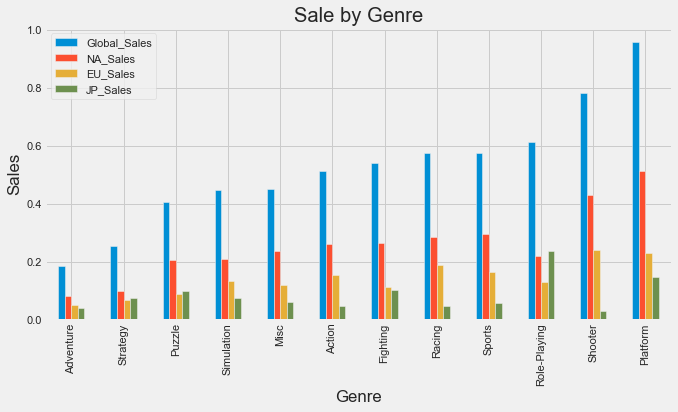

In [208]:
df.groupby('Genre')['Global_Sales','NA_Sales','EU_Sales','JP_Sales'].mean().sort_values(by=['Global_Sales'],ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('Sales')
plt.title('Sale by Genre')
#plot by sale
#platform game significantly has a higher sale

# df.groupby('Genre')['NA_Sales'].mean()


# df.groupby('Genre')['EU_Sales'].mean()
# #this is not the case for EU, it is shooter with highest sale and Platform games just a bit lower

# df.groupby('Genre')['JP_Sales'].mean()
#in Japan Role-Playing games significantly has a higher sale

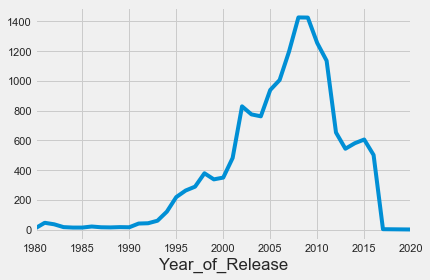

In [184]:
df.groupby('Year_of_Release')['Platform'].count().plot()

In [185]:
df_year_platf = df.groupby('Year_of_Release').Platform.value_counts()
number_of_plots = len(df.Year_of_Release.unique())
colormap = plt.cm.gist_ncar # set colormap for next plot

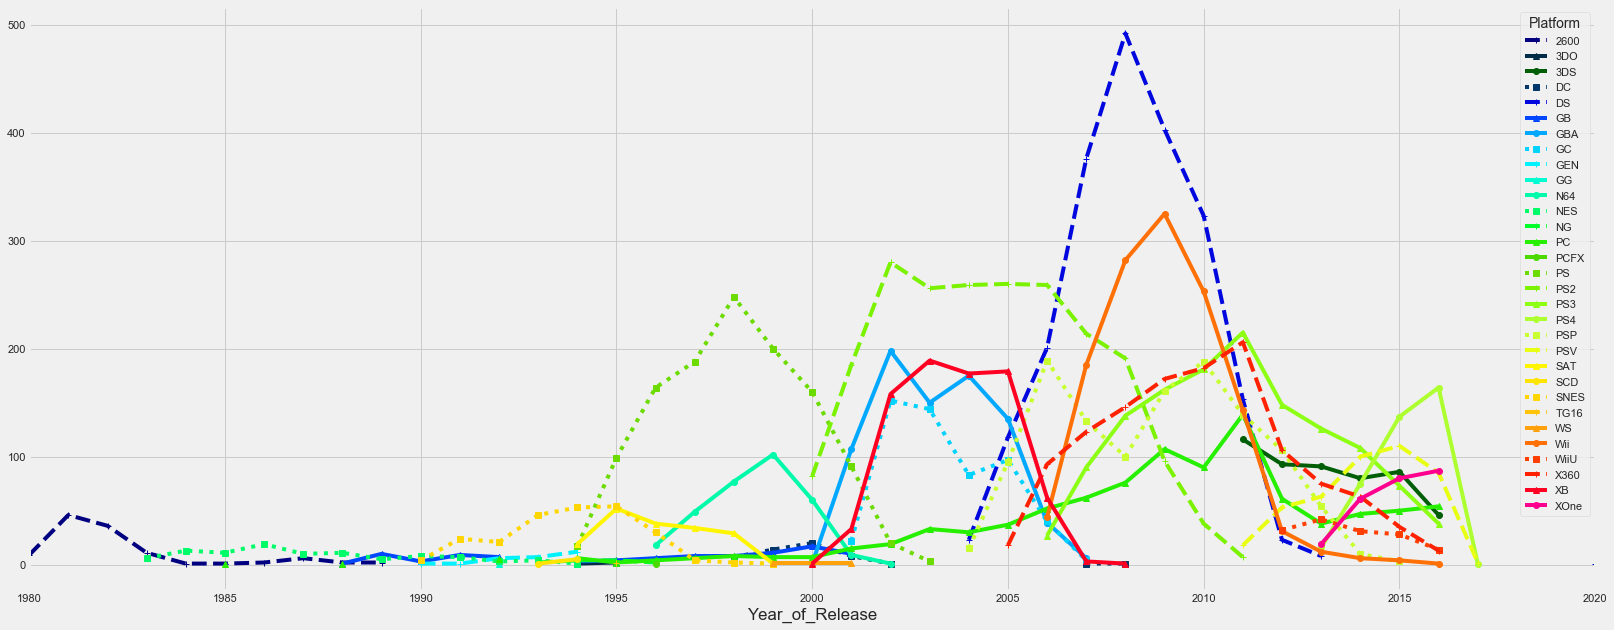

In [186]:
linestyle = ["+--","^-",'-o',':s']*10# line styles, 40 plots so we repeat the list 10 times
colors = [colormap(i) for i in np.linspace(0, 1,number_of_plots)]# colors gradient of colormap
df_year_platf.unstack().plot(kind='line',style=linestyle,figsize=(25,10), stacked=False,color = colors)
plt.show()